Downloading dataset from kaggle through API key

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Resume_Screening/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Resume_Screening/Kaggle

/content/gdrive/My Drive/Resume_Screening/Kaggle


In [ ]:
!ls

Resumes  UpdatedResumeDataSet.csv


In [ ]:
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

# **Dataset**

In [ ]:
data = pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')
data['Cleaned_Resume'] = ''
data

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [ ]:
print("Resume Categories : ")
print(data['Category'].value_counts())

Resume Categories : 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Blockchain                   40
Mechanical Engineer          40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


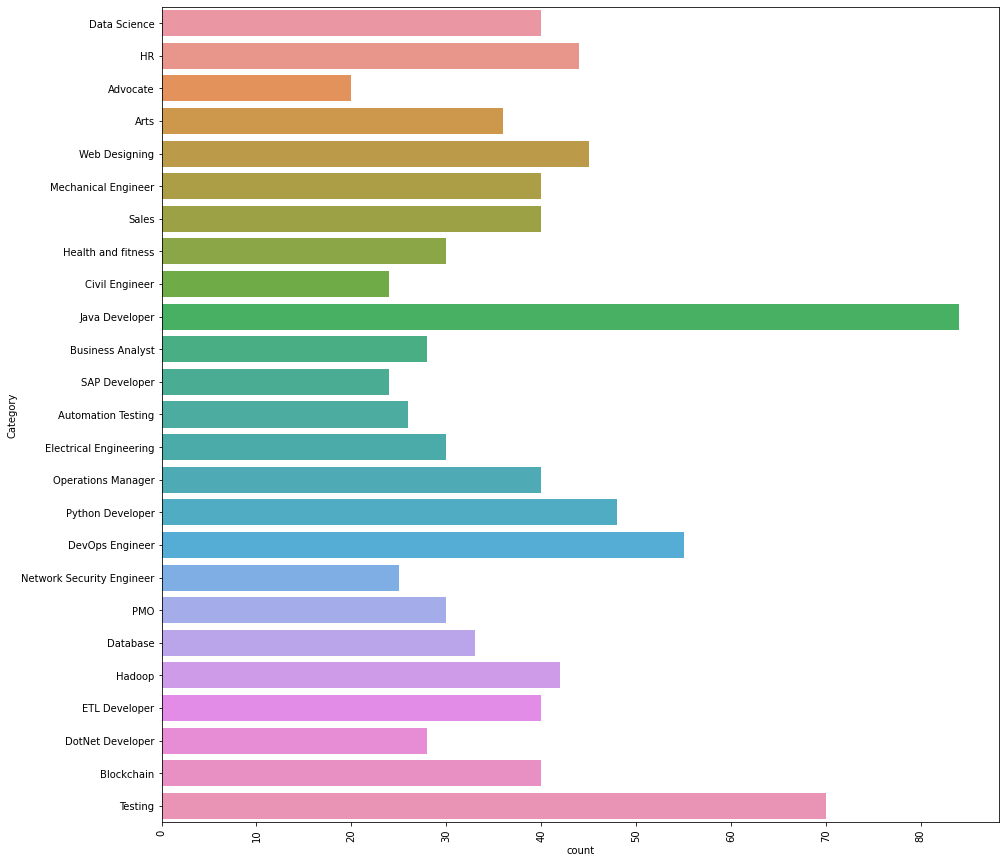

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

# **Cleaning the dataset**

In [ ]:
import re

def cleaned_data(resume_data):
    #removing all URLs.
    resume_data = re.sub('http\S+\s*', ' ', resume_data)
    #removing RT and cc.
    resume_data = re.sub('RT|cc', ' ', resume_data)
    #removing hashtags
    resume_data = re.sub('#\S+', '', resume_data)
    #removing mentions
    resume_data = re.sub('@\S+', '  ', resume_data)
    #removing punctuations
    resume_data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_data)
    #removing all non-ASCII values.
    resume_data = re.sub(r'[^\x00-\x7f]',r' ', resume_data)
    #removing extra whitespaces
    resume_data = re.sub('\s+', ' ', resume_data) 
    return resume_data

In [ ]:
for i,resume in enumerate(data['Resume']):
  data['Cleaned_Resume'][i] = cleaned_data(resume)

Cleaned Data

In [ ]:
data.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
print("Length of dataset :",len(data))

Length of dataset : 962


# **Information regarding Dataset**

In [ ]:
#getting the complete text from the dataset.
corpus = ""
for i in range(0,len(data)):
  corpus = corpus + data['Cleaned_Resume'][i].lower()

In [ ]:
corpus[0:1000]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the 

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#creating the tokenizer.
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
print("Total number of tokens :", len(tokens))

Total number of tokens : 411913


In [ ]:
#getting the stop words from nltk dataset.
stopwords = nltk.corpus.stopwords.words('english')
print("Total number of stopwords :", len(stopwords))

Total number of stopwords : 179


In [ ]:
#removing the stop words from the tokens.
words = []
for token in tokens:
    if token not in stopwords:
        words.append(token)

print("Total number of words after removal of stopwords :", len(words))

Total number of words after removal of stopwords : 318305


# **Lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 
lemmatized_words = []
for word in words : 
  word = lemmatizer.lemmatize(word)
  lemmatized_words.append(word)

print("Total number of lemmatized words :", len(lemmatized_words))

Total number of lemmatized words : 318305


In [ ]:
frequency_distribution = nltk.FreqDist(lemmatized_words)
common_words = frequency_distribution.most_common(10)
print("Top 10 common words : ")
print(common_words)

Top 10 common words : 
[('project', 4071), ('exprience', 3829), ('company', 3635), ('month', 3344), ('detail', 3132), ('description', 3122), ('team', 2159), ('data', 2138), ('1', 2134), ('management', 2024)]


# **Frequency Distribution**

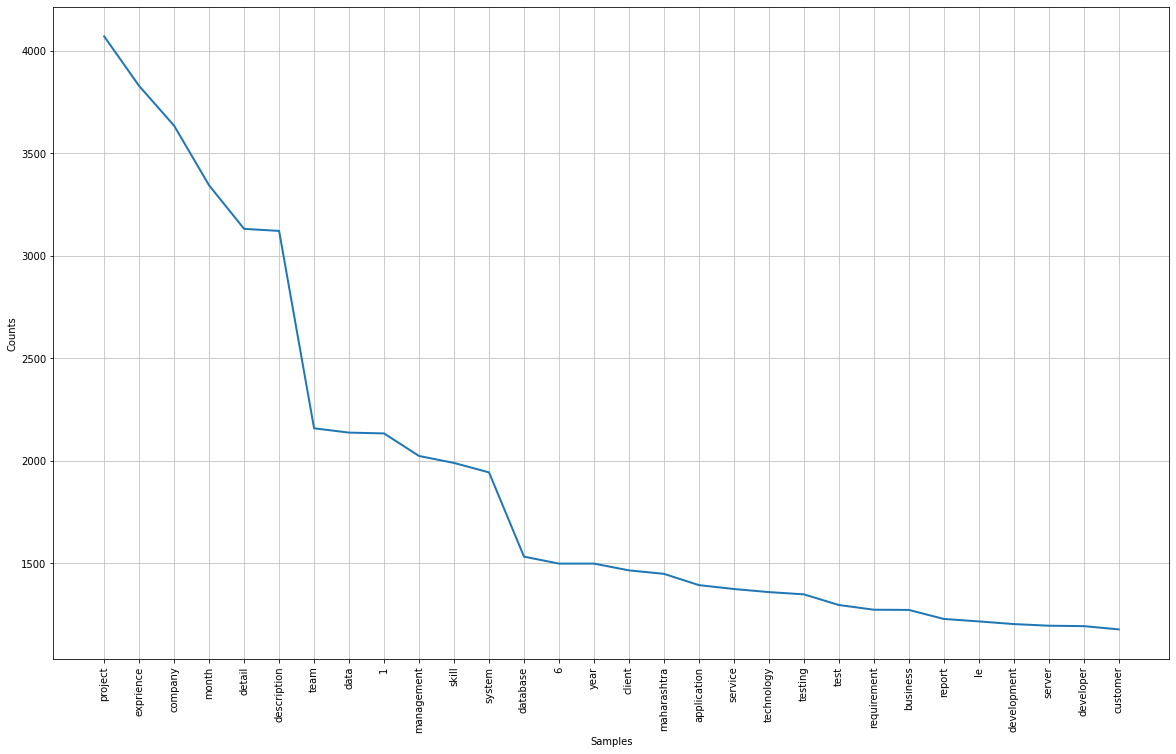

In [ ]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
frequency_distribution.plot(30)

# **WordCloud**

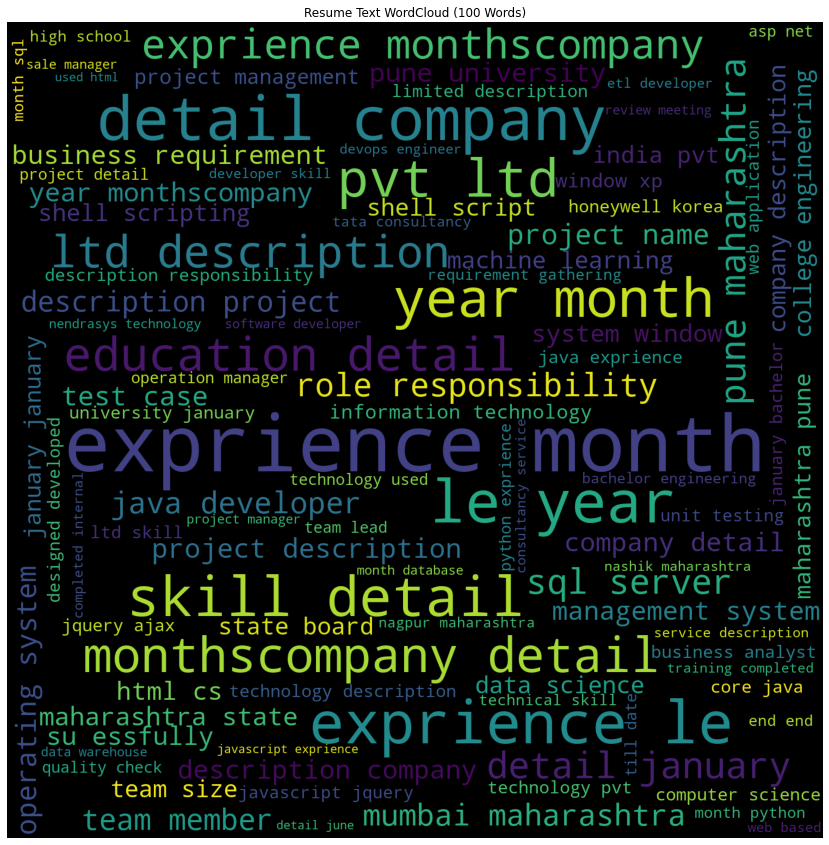

In [ ]:
#converting into string
string = ' '.join([i for i in lemmatized_words if not i.isdigit()])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(background_color = 'black', max_words = 100, width = 1500, height = 1500).generate(string)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

**Encoding the labels under "Category"**

In [ ]:
from sklearn import preprocessing
import copy
#label encoder
le = preprocessing.LabelEncoder()
temp = copy.deepcopy(data['Category'])
le.fit(temp)
categories = le.classes_
#converting the categorical data into labels.
data['Category'] = le.transform(temp)

In [ ]:
categories

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

**Getting the training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#getting the resume text and categories from data.
X = data['Cleaned_Resume'].values
y = data['Category'].values
#using the TfidfVectorizer to transform the text into vector.
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = 'english')
word_vectorizer.fit(X)
word_features = word_vectorizer.transform(X)
#splitting the dataset into training and test data.
X_train,X_test,y_train,y_test = train_test_split(word_features, y, random_state=0, test_size=0.2)
print("Shape of X-train : ",X_train.shape)
print("Shape of X-test : ",X_test.shape)

Shape of X-train :  (769, 7351)
Shape of X-test :  (193, 7351)


In [ ]:
from sklearn import linear_model
from sklearn import metrics

# **Training the model**

In [ ]:
#this estimator implements regularized linear models with stochastic gradient descent
model = linear_model.SGDClassifier(loss = 'log')
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train)

array([0.99350649, 0.99350649, 0.99350649, 1.        , 0.9869281 ])

In [ ]:
for i in prediction:
  print(categories[i])

Python Developer
Health and fitness
Data Science
Network Security Engineer
Java Developer
Health and fitness
ETL Developer
Health and fitness
Java Developer
Automation Testing
Data Science
Testing
Business Analyst
Electrical Engineering
Hadoop
Business Analyst
PMO
DevOps Engineer
DevOps Engineer
DotNet Developer
HR
Electrical Engineering
Network Security Engineer
Sales
PMO
Mechanical Engineer
Civil Engineer
DevOps Engineer
Blockchain
DevOps Engineer
Python Developer
Operations Manager
Sales
Database
Testing
Testing
Sales
Operations Manager
Database
Python Developer
ETL Developer
Python Developer
Health and fitness
DevOps Engineer
Java Developer
Java Developer
DevOps Engineer
Electrical Engineering
Business Analyst
Sales
Arts
Web Designing
Health and fitness
Java Developer
Sales
Testing
DevOps Engineer
Java Developer
Blockchain
Network Security Engineer
Operations Manager
Blockchain
Advocate
Java Developer
Java Developer
Java Developer
Mechanical Engineer
SAP Developer
Hadoop
Operations

**Converting Pdf file to text**

In [ ]:
!pip install tika

In [ ]:
from tika import parser
raw = parser.from_file('/content/sample_input.pdf')
pdftext = raw['content']
#cleaning pdf text.
pdftext = cleaned_data(pdftext)
pdftext

' Indeed Resume Dushyant Bhatt BI Big Data Azure Hyderabad De an Telangana Telangana Email me on Indeed indeed com r Dushyant Bhatt 140749dace5dc26f 10 years of Experience in Designing Development Administration Analysis Management in the Business Intelligence Data warehousing Client Server Technologies Web based Applications cloud solutions and Databases Data warehouse Data analysis star snow flake schema data modeling and design specific to data warehousing and business intelligence environment Database Experience in database designing scalability back up and recovery writing and optimizing SQL code and Stored Procedures creating functions views triggers and indexes Cloud platform Worked on Microsoft Azure cloud services like Document DB SQL Azure Stream Analytics Event hub Power BI Web Job Web App Power BI Azure data lake analytics U SQL Big Data Worked Azure data lake store analytics for big data processing and Azure data factory to schedule U SQL jobs Designed and developed end to

Using the model to classify the text based on "Category"

In [ ]:
#getting the feature vector from the pdf text
features = word_vectorizer.transform([pdftext])

In [ ]:
encoded_label = model.predict(features)
print(categories[encoded_label])

['Data Science']


Given a folder with docx files, using the model to predict the category for each resume

In [ ]:
directory = '/content/gdrive/MyDrive/Resume_Screening/Kaggle/Resumes'
filenames = []
# iterate over files in that directory.
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  filenames.append(filename)

In [ ]:
filenames

['Priyanka Sr BSA Resume.docx',
 'Randy Adams.docx',
 'Shiuli Mahmud.docx',
 'Tarun Resume.docx',
 'VIJETHA G.docx',
 'Vishnu Java dev.docx',
 'Priya B.docx',
 'employer_mounika details.docx',
 'jagadeesh k.docx',
 'Mehul.docx',
 'Shelly Woods.docx',
 'Samir Naik-NJ - Feb 2018-V6.0.docx',
 'manish_singh_resume.docx',
 'Vikash_BA_Ab.docx',
 'Mani_Hadoop.docx',
 'Tushar Patel.docx',
 'MounikaReddy.docx',
 'Resume - Sr PM.docx',
 'Sai Srinivas_Sr_Java_Developer.docx',
 'srinivas b.docx',
 'Ujvala BA Feb 20.docx',
 'Vijay Bhargav.docx',
 'sairithvik alla.docx',
 'nithin katapally.docx',
 'venu b.docx',
 'komal patel.docx',
 'jeck P.docx',
 'Navneeth Resume.docx',
 'Sravani Battu.docx',
 'Sravani Singirikonda.docx',
 'Manohar Reddy.docx',
 'vema reddy.docx',
 'Sai kumar.docx',
 'vikas java.docx',
 'SUNITHA Project Manager (1).docx',
 'Pankaj BSA.docx',
 'Madhuri Pawar.docx',
 'Mounika health care resume.docx',
 'avinash G.docx',
 'Kumar Raj.docx',
 'indrakaran soma.docx',
 'Raja Santhosam_P

In [ ]:
!pip install python-docx

Converting the text in docx file to string

In [ ]:
import docx

def getText(filename):
  doc = docx.Document(filename)
  fullText = []
  #getting the complete text from docx file
  for para in doc.paragraphs:
      fullText.append(para.text)
  return '\n'.join(fullText)

In [ ]:
resumes = []
for i in filenames:
  new_directory = directory+'/'+i
  text = getText(new_directory)
  #appending the text to a list.
  resumes.append(text)

In [ ]:
resumes[0]

"PRIYANKA                                \nSr. Business System Analyst\n\nPROFESSIONAL SUMMARY:\n    Proactive, confident, goal-oriented, pragmatic and attentive Sr. Business Analyst and Business system analyst with over 8 years of experience in Retail, Banking, E-commerce domains with a focus on designing, development, implementation of business processes and system solutions with the addition of an in-depth domain understanding of the entire retail business operations.\n   -Certified Scrum Master with a thorough understanding of Agile principles and Scrum ceremonies.\n   -Experienced and have detailed knowledge about Order Management System, Retail POS Applications, Customer Relationship Management (CRM i.e. Loyalty Program), E-commerce platforms.\n    -Extensive knowledge, expertise and involvement in various phases of Software Development Life Cycle (SDLC) in Waterfall, Scrum, Agile (Extreme Programming, Test-Driven Development) and Scrum-Waterfall Hybrid and SAFe software developm

Pre-processing the text data and using the model to predict the top 3 categories which the resume might belong to.

In [ ]:
cleaned_resumes = []
new_resume_data = {}
pie_chart = {}
for count,resume in enumerate(resumes):
  #cleaning the resume text
  cleaned_resume = cleaned_data(resume)
  #appending the cleaned data to a list.
  cleaned_resumes.append(cleaned_resume) 
  #getting the feature vector for the cleaned text.
  word_features = word_vectorizer.transform([cleaned_resume])
  #getting the probabilities for each category.
  probabilities = model.predict_proba(word_features)
  #getting the top 3 predictions from the model(but they are encoded labels.)
  best_three = np.argsort(probabilities, axis=1)[:,-3:]

  #storing the required data.
  best_three_list = []
  for i in best_three:
    #converting the encoded labels to the actual labels.
    best_three_list.append(categories[i])
    if categories[i][0] in pie_chart:
      pie_chart[categories[i][0]] += 1
    else : 
      pie_chart[categories[i][0]] = 1

  new_resume_data[count] = (best_three_list, resume, filenames[count])

# **Visualising the distribution of categories**

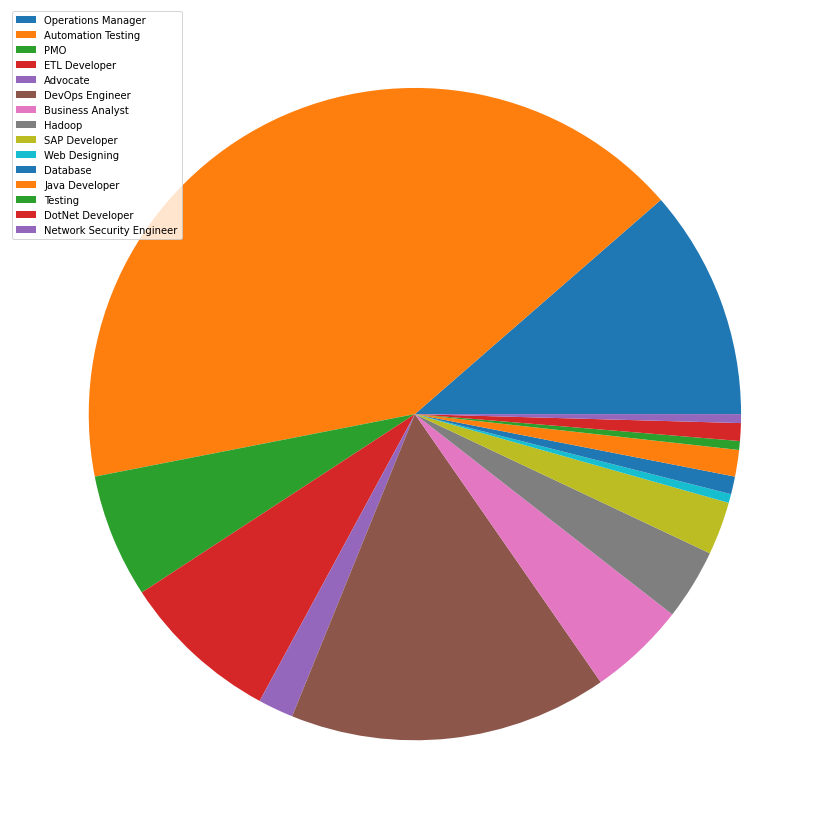

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(pie_chart.values())
plt.legend(labels = pie_chart.keys())
plt.show()

# **All categories**

In [ ]:
for i in range(len(categories)):
  print(str(i) + ". " + categories[i])

0. Advocate
1. Arts
2. Automation Testing
3. Blockchain
4. Business Analyst
5. Civil Engineer
6. Data Science
7. Database
8. DevOps Engineer
9. DotNet Developer
10. ETL Developer
11. Electrical Engineering
12. HR
13. Hadoop
14. Health and fitness
15. Java Developer
16. Mechanical Engineer
17. Network Security Engineer
18. Operations Manager
19. PMO
20. Python Developer
21. SAP Developer
22. Sales
23. Testing
24. Web Designing


# **Category Input**

In [ ]:
category_numbers = list(map(int, input("Enter category numbers (upto : 3): ").split()))

Enter category numbers (upto : 3): 21 18 7


In [ ]:
category_numbers

[21, 18, 7]

In [ ]:
requested_data = {}
requested_categories = []

for i in category_numbers :
  requested_categories.append(categories[i])

required = len(requested_categories)
while required > 1 : 
  print("Resumes with ",str(required), " requested categories.")
  for i in range(0,len(new_resume_data)):
    count = 0
    for category_list in new_resume_data[i][0]:
      for cat in category_list:
        if cat in requested_categories: 
          count += 1

    if count == required:
      print("\tSkills : ", new_resume_data[i][0])
      print("\tFile name : ", new_resume_data[i][2])
      # print("\tResume : ", new_resume_data[i][1])
      print("\n")
  required -= 1
  print("----------------------------------------")
  

Resumes with  3  requested categories.
	Skills :  [array(['SAP Developer', 'Operations Manager', 'Database'], dtype=object)]
	File name :  Deepika DC.docx


----------------------------------------
Resumes with  2  requested categories.
	Skills :  [array(['SAP Developer', 'Operations Manager', 'Business Analyst'],
      dtype=object)]
	File name :  SUNITHA Project Manager (1).docx


	Skills :  [array(['Operations Manager', 'Database', 'Network Security Engineer'],
      dtype=object)]
	File name :  Praveen B.docx


	Skills :  [array(['SAP Developer', 'Business Analyst', 'Operations Manager'],
      dtype=object)]
	File name :  Nandini_Resume.docx


	Skills :  [array(['Database', 'PMO', 'Operations Manager'], dtype=object)]
	File name :  Srivatsan_Project_Manager.docx


	Skills :  [array(['SAP Developer', 'Business Analyst', 'Operations Manager'],
      dtype=object)]
	File name :  Jimi_Desai_PM.docx


	Skills :  [array(['DevOps Engineer', 'SAP Developer', 'Operations Manager'],
      d

# **Saving the model**

In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Screening/

/content/gdrive/MyDrive/Resume_Screening


In [ ]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)